In [1]:
import os
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
print(tf.test.is_built_with_cuda())

True


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [3]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

In [4]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [6]:
TRAINING_DIR = "train"
training_datagen = ImageDataGenerator(
    rescale = 1./255)

VALIDATION_DIR = "test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=100
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=100
)

Found 2415 images belonging to 3 classes.
Found 1617 images belonging to 3 classes.


In [7]:
# Train the model
history = model.fit(train_generator, epochs=40, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/40
20/20 [==============================] - 7s 208ms/step - loss: 0.9123 - accuracy: 0.7191 - val_loss: 0.6244 - val_accuracy: 0.8033
Epoch 2/40
20/20 [==============================] - 4s 184ms/step - loss: 0.3438 - accuracy: 0.8965 - val_loss: 0.5966 - val_accuracy: 0.8567
Epoch 3/40
20/20 [==============================] - 4s 179ms/step - loss: 0.2419 - accuracy: 0.9389 - val_loss: 0.3203 - val_accuracy: 0.9367
Epoch 4/40
20/20 [==============================] - 4s 178ms/step - loss: 0.1689 - accuracy: 0.9593 - val_loss: 0.3713 - val_accuracy: 0.9233
Epoch 5/40
20/20 [==============================] - 4s 179ms/step - loss: 0.1613 - accuracy: 0.9567 - val_loss: 0.4957 - val_accuracy: 0.8933
Epoch 6/40
20/20 [==============================] - 4s 178ms/step - loss: 0.1233 - accuracy: 0.9744 - val_loss: 0.3966 - val_accuracy: 0.9233
Epoch 7/40
20/20 [==============================] - 4s 179ms/step - loss: 0.0887 - accuracy: 0.9864 - val_loss: 0.3214 - val_accuracy: 0.9333
Epoch 

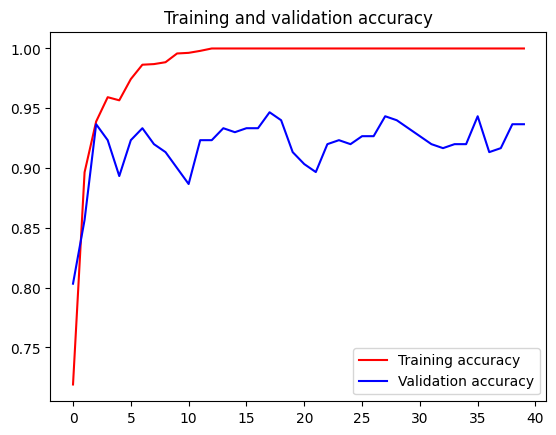

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [9]:
import numpy as np
import keras.utils as image

In [10]:
PREDICTION_DIR = "prediction"

for image_name in os.listdir(PREDICTION_DIR):
 
  # predicting images
  path = "prediction\\" + image_name
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)

1/1 [==============================] - 0s 99ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 10ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 10ms/step
[[0. 0. 1.]]
